# Support Vector  Classification

$$
y(\mathbf{x}) = \text{sign}(\mathbf{w}^T \mathbf{x} + b)
$$

where:

$y(\mathbf{x})$ is the predicted class label for the input vector $\mathbf{x}$.
$\mathbf{w}$ is a weight vector.
$b$ is a bias term.
$\text{sign}(\cdot)$ is the sign function, which returns +1 if its argument is positive and -1 if its argument is negative.
The weight vector $\mathbf{w}$ and bias term $b$ are learned from the training data using an optimization algorithm that maximizes the margin between the decision boundary and the closest data points from each class. This optimization problem is typically solved using a quadratic programming algorithm.

The decision boundary is defined by the hyperplane $\mathbf{w}^T \mathbf{x} + b = 0$, which separates the two classes in the input space. The support vectors are the training examples that lie closest to the decision boundary, and they are used to define the margin of the classifier.

In [36]:
%matplotlib inline

import statsmodels.api as sm
import xlrd
import scipy 

from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import libraries
from datetime import date
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from statsmodels.tsa.api import VAR
import statsmodels.formula.api as smf
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.ticker as mtick
from matplotlib import rcParams
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates

from datetime import date
from dateutil.relativedelta import relativedelta
mpl.rcParams['figure.figsize'] = [8,5]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['patch.facecolor']='xkcd:white'


blue1='#1544B1'
blue2='#70BAFF'
red1='#F57775'
grey1='#A7B1C5'
purple2='#108571'

import numpy as np
import pylab as pl
import matplotlib


matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "10"

import seaborn as sns

sns.set_palette("viridis")

# 1. Data preprocessing

In [37]:
train = pd.read_csv('datasets/train (1).csv')
test = pd.read_csv('datasets/test (1).csv')


df = test
df['Sex'].mask(df['Sex'] =='male' ,1, inplace=True)
df['Sex'].mask(df['Sex'] =='female' ,2, inplace=True)


del df['Cabin']
del df['Ticket']

del df['Name']

df['Embarked'].mask(df['Embarked'] =='S' ,1, inplace=True)
df['Embarked'].mask(df['Embarked'] =='Q' ,2, inplace=True)
df['Embarked'].mask(df['Embarked'] =='C' ,3, inplace=True)


df = df.dropna()



df = train
df['Sex'].mask(df['Sex'] =='male' ,1, inplace=True)
df['Sex'].mask(df['Sex'] =='female' ,2, inplace=True)


del df['Cabin']
del df['Ticket']

del df['Name']

df['Embarked'].mask(df['Embarked'] =='S' ,1, inplace=True)
df['Embarked'].mask(df['Embarked'] =='Q' ,2, inplace=True)
df['Embarked'].mask(df['Embarked'] =='C' ,3, inplace=True)


df = df.dropna()
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,2,38.0,1,0,71.2833,3
2,3,1,3,2,26.0,0,0,7.9250,1
3,4,1,1,2,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


# 2. Data exploration 

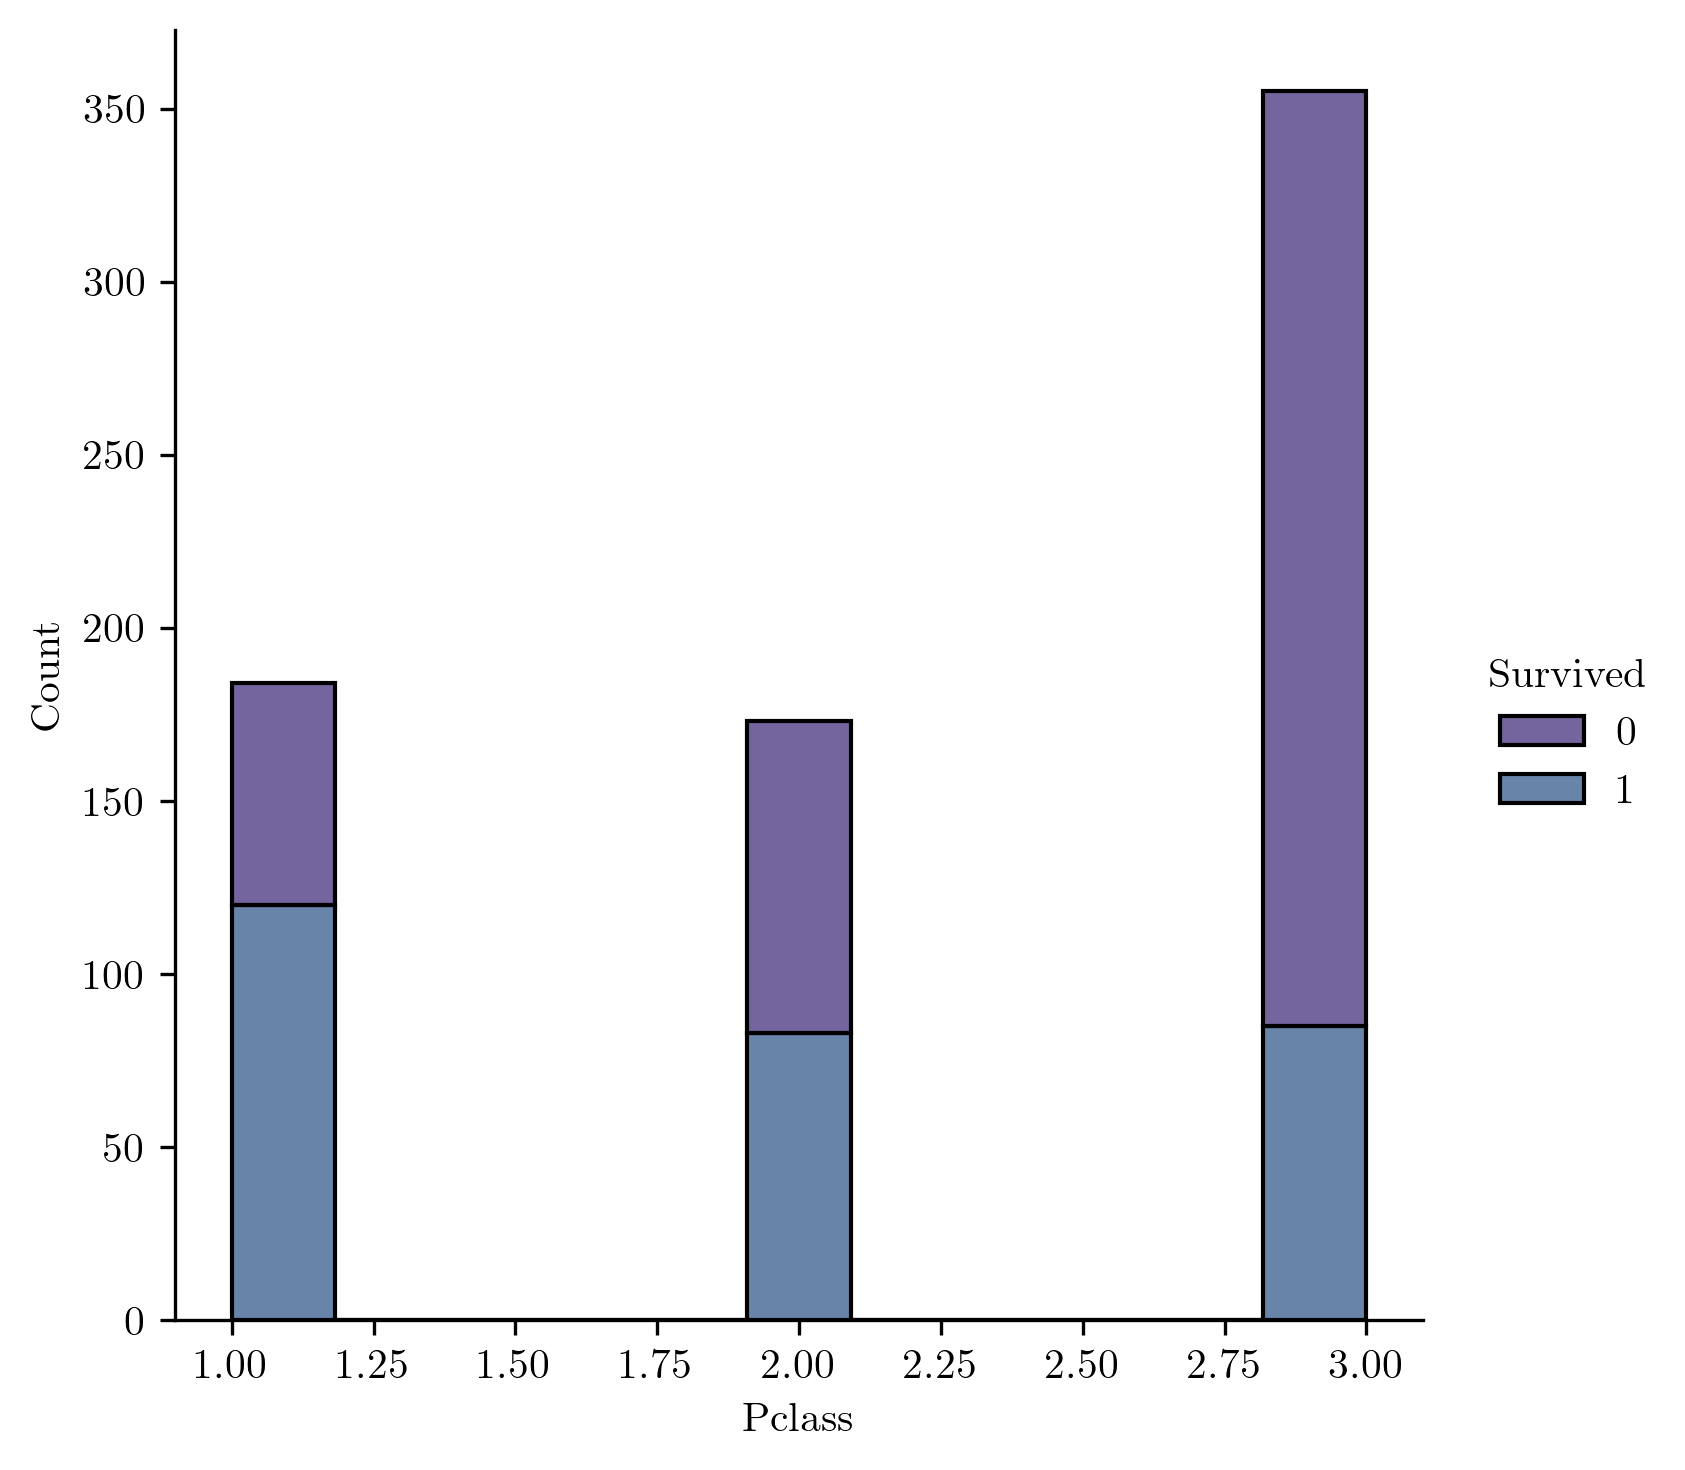

In [38]:
sns.displot(df, x="Pclass", hue="Survived", multiple="stack")



<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

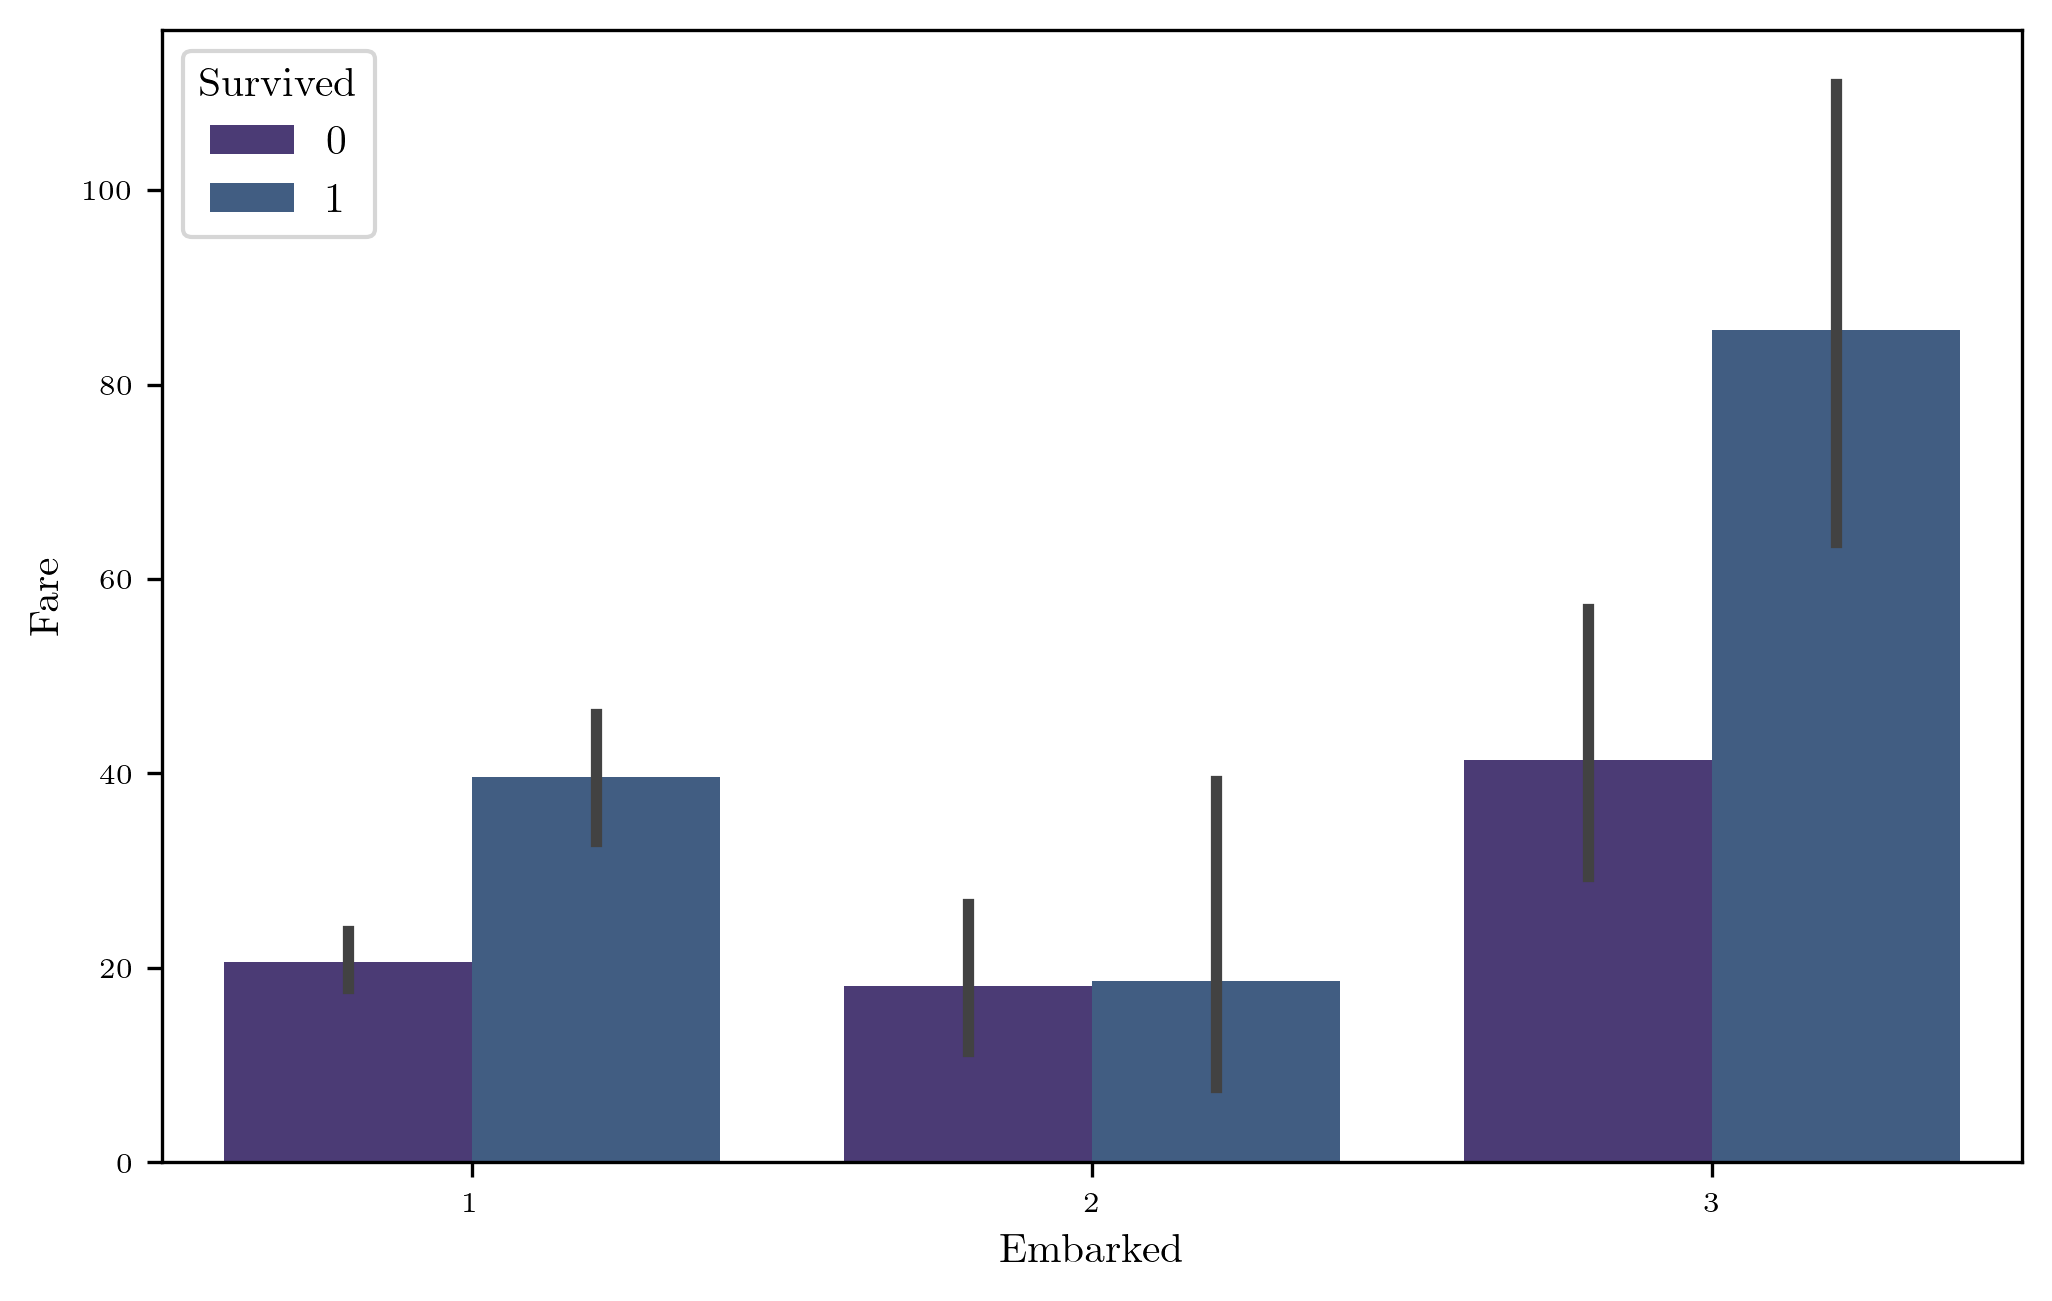

In [42]:
sns.barplot(x='Embarked',y='Fare', hue='Survived',data= df)

<AxesSubplot: >

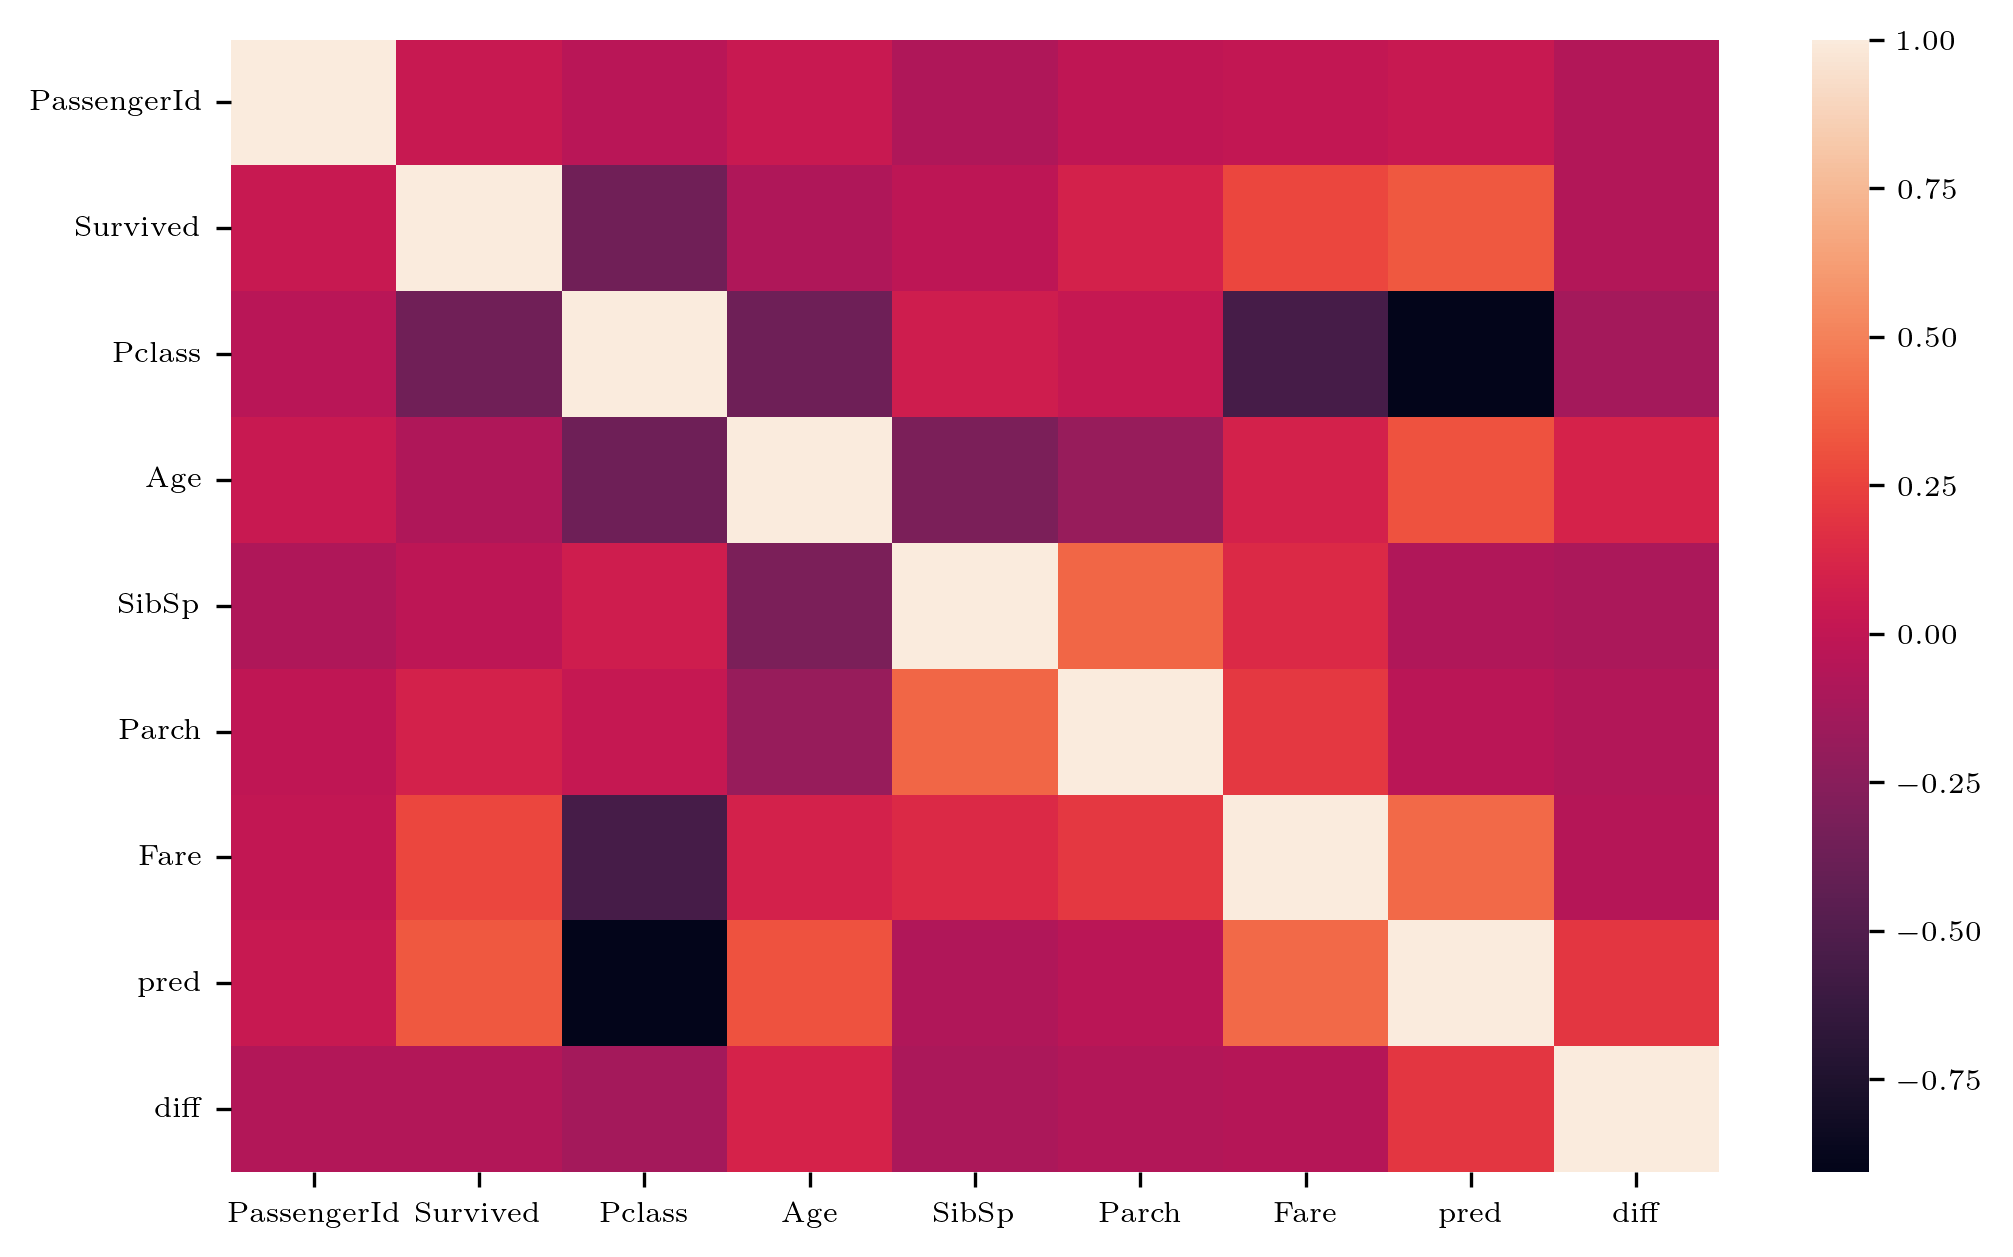

In [43]:
import seaborn as sns
corrmat = df.corr()

sns.heatmap(corrmat)

# 3. Forecast


# Support Vector Classification (SVC)


The Support Vector Classification (SVC) is a supervised machine learning algorithm used for binary classification tasks. It works by finding the hyperplane that maximizes the margin between the two classes of data. The hyperplane is defined as the line that separates the two classes of data in feature space.

To find the hyperplane, the SVC algorithm uses a set of support vectors. These support vectors are the data points closest to the hyperplane, and they play a crucial role in defining the hyperplane. The goal of the SVC algorithm is to find the hyperplane that maximizes the distance between the support vectors on either side of the hyperplane.

In mathematical terms, the SVC algorithm is an optimization problem where the objective function is to minimize the classification error subject to a constraint on the margin. This optimization problem can be solved using various techniques such as quadratic programming or gradient descent.

Once the hyperplane is defined, new data points can be classified by determining which side of the hyperplane they fall on. Data points that fall on one side of the hyperplane are classified as belonging to one class, and data points that fall on the other side of the hyperplane are classified as belonging to the other class.

The effectiveness of the SVC algorithm is due to its ability to handle high-dimensional data and nonlinear relationships between features. By transforming the data into a higher-dimensional space, the SVC algorithm can find a hyperplane that separates the data even when the relationship between features is not linear.

For k =  1  :  0.6503496503496503
For k =  2  :  0.6503496503496503
For k =  3  :  0.6293706293706294
For k =  4  :  0.6573426573426573
For k =  5  :  0.6153846153846154
For k =  6  :  0.6713286713286714
For k =  7  :  0.6573426573426573
For k =  8  :  0.6993006993006993
For k =  9  :  0.6923076923076923
For k =  10  :  0.6923076923076923
For k =  11  :  0.6853146853146853
For k =  12  :  0.6503496503496503
For k =  13  :  0.6573426573426573
For k =  14  :  0.6853146853146853
For k =  15  :  0.6993006993006993
For k =  16  :  0.7062937062937062
For k =  17  :  0.6923076923076923
For k =  18  :  0.6853146853146853


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


For k =  19  :  0.6993006993006993


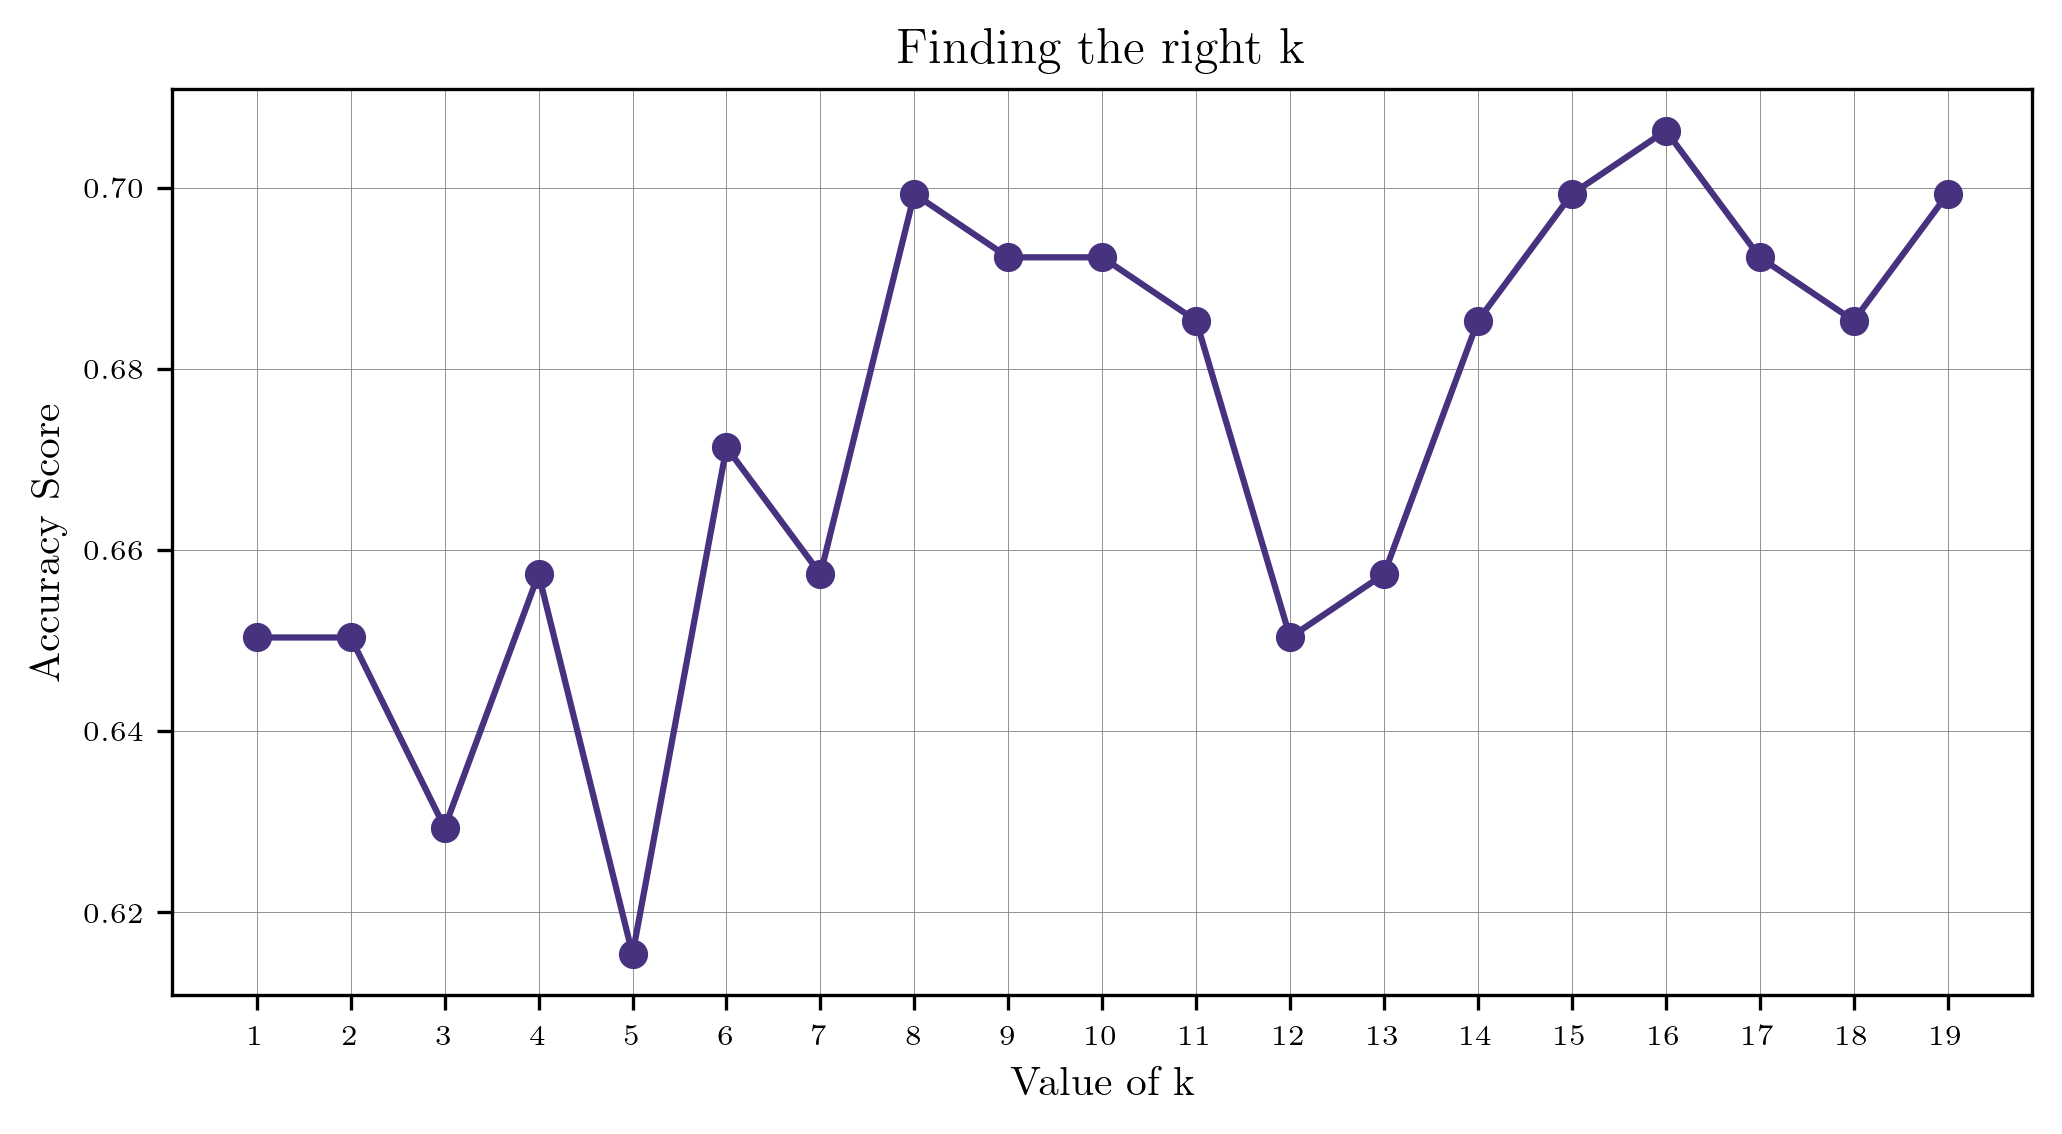

In [40]:
X = df[["Pclass","Sex", "Age", "Fare"]]
Y = df["Survived"]
X_TEST = df[["Pclass","Sex", "Age", "Fare"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))

matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('xkcd:white')
plt.title("Finding the right k", fontweight = "bold", size = 12)
ax.set_ylabel("Accuracy Score")


plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")

plt.xticks(range(1,20))

ax.legend(loc='upper left', fontsize='x-small', framealpha=0.2, edgecolor='white')
plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.show()

In [49]:
from sklearn import svm
import numpy as np

# Making dataset
X = np.array((df['Pclass'].values)).reshape(-1,1)
Y = np.array((df.Survived.values))



# Now lets train svm model
model = svm.SVC(kernel='linear')
model.fit(X, Y)

# Lets predict for new input
n_data = np.array(df['Pclass'].values).reshape(-1,1)
ypred = model.predict(n_data)

actual = list(df.Survived.values)



print("Accuracy for training data : ",accuracy_score(actual,ypred))

Accuracy for training data :  0.6643258426966292


# Random Forest Classifier

$$
\hat{y} = \text{RF}(x) = \frac{1}{B} \sum_{b=1}^B \text{tree}_b(x)
$$

where:

$\hat{y}$ is the predicted class label for the input vector $x$.
$\text{RF}(x)$ is the random forest classifier function that combines the predictions of $B$ decision trees.
$\text{tree}_b(x)$ is the prediction of the $b$-th decision tree for the input vector $x$.
$B$ is the number of decision trees in the random forest.
Each decision tree is constructed by recursively partitioning the feature space into regions based on the values of the input features. At each node, the feature that provides the greatest information gain is used to split the data, until a stopping criterion is met (e.g., a maximum depth is reached or the number of samples in a leaf node falls below a threshold). The final prediction of the tree is the majority vote of the training samples that fall within the region of the tree's leaf nodes.

The random forest classifier averages the predictions of the individual decision trees to reduce overfitting and improve generalization performance. This averaging reduces the variance of the model and improves its robustness to noise and outliers.

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.8321678321678322


# Logistic Regression

$$
P(Y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^T\mathbf{x} + b)
$$
where:

$P(Y=1 \mid \mathbf{x})$ is the probability of the positive class given the input vector $\mathbf{x}$.
$\sigma(\cdot)$ is the sigmoid function, defined as $\sigma(z) = \frac{1}{1 + e^{-z}}$.
$\mathbf{w}$ is a weight vector.
$b$ is a bias term.
The weight vector $\mathbf{w}$ and bias term $b$ are learned from the training data using maximum likelihood estimation. The logistic regression model assumes that the log-odds of the positive class given the input vector $\mathbf{x}$ can be expressed as a linear function of the input features. The sigmoid function then maps the log-odds to a probability value between 0 and 1.

The decision boundary is defined by the hyperplane $\mathbf{w}^T \mathbf{x} + b = 0$, which separates the two classes in the input space. Samples with a probability greater than 0.5 are predicted as belonging to the positive class, while samples with a probability less than or equal to 0.5 are predicted as belonging to the negative class.



In [48]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array(df['Sex'].values).reshape(-1,1)
y = numpy.array(df['Survived'].values)

logr = linear_model.LogisticRegression()
logr.fit(X,y)


yhat = logr.predict(numpy.array(df['Sex'].values).reshape(-1,1))
print("Accuracy for training data : ",accuracy_score(y,yhat))

Accuracy for training data :  0.7794943820224719


# Conclusion: 

For the titanic dataset, the Random Forest Classification scaled the best results with an accuracy score of around 0.83